# Equivalent layer technique for estimating total magnetization direction : Iteration process and L-curve application 

Notebook to perform the inversion process. The L-curve 

## Importing libraries

In [22]:
% matplotlib inline 

In [23]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st

from fatiando.gridder import regular

In [24]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

## Plot style

In [25]:
plt.style.use('ggplot')

## Importing my package

In [26]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [27]:
import auxiliary_functions as fc

## Loading the model

In [28]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

## Loading observation points

In [29]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

## Loading data set

In [30]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Open a dictionary

In [31]:
result_RM_airb = dict()

## List of saved files

In [32]:
saved_files = []

## Observation area

In [33]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


## Airborne survey information

In [34]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [35]:
inc_gf,dec_gf = model_multi['main_field']

In [36]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [37]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [38]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer

### Layer depth

In [39]:
h = 1150.

### Generating the equivalent sources coordinates

In [40]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [41]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

## Iteration process : LM-NNLS for positive magnetic-moment distribution

In [42]:
i_pos = 1250

In [43]:
it_max = 30

In [44]:
it_marq = 15

In [45]:
lamb = 10.
dlamb = 100.

In [46]:
eps_e = 1e-4
eps_i = 1e-4

In [47]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,2*1e6] 

In [48]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.737677904019263 -7.818420691718886
0.12635368688499923
i = 1
-19.589690222749578 -5.306859051519267
0.09053520194162461
i = 2
-22.385073270763513 -2.706532855201764
0.06827425890289872
i = 3
-24.50920961591835 -0.1645800633897442
0.05332253566212519
i = 4
-26.186260937712305 2.3627966749170386
0.04515982543535642
i = 5
-27.500874412252962 4.945239483822772
0.041403877790679784
i = 6
-28.497666359582958 7.5831794660771985
0.04032336996384531
i = 7
-29.21588856656365 10.169077242142958
0.03863954848468471
i = 8
-29.709674167798845 12.61307658460391
0.03603607839165492
i = 9
-30.00699882176449 14.890541131783987
0.03340662400268915
i = 10
-30.150145076134717 16.94944852350661
0.029682294989395723
i = 11
-30.182875085327787 18.75717862107179
0.02498851880117173
i = 12
-30.146922458189955 20.31583560459835
0.020180038841557963
i = 13
-30.075518734962042 21.6386137023191
0.015604007198370613
i = 14
-29.98507471012455 22.74518626757167
0.011585920444461125
i = 15
-29.889593773787198

-29.254037730651252 28.796807956933108
0.000534157089335928
i = 29
-29.224174826109504 29.0023161376284
0.0004763839814493538
i = 30
-29.19448665513042 29.19433048507341
0.00041911394599199636
i = 31
-29.164983972154104 29.37351919549365
0.0003680467022873879
i = 32
-29.135060550250092 29.542541538777133
0.0003308010421574884
i = 33
-29.104368790091463 29.702962886547123
0.000301559680938111
i = 34
-29.07289915154213 29.855113984003484
0.00027493693205185327
i = 35
-29.04084277476908 29.999466898175232
0.0002509350261808387
i = 36
-29.008390950592336 30.136573391034112
0.0002295584299851583
i = 37
-28.975724876510203 30.267254493438333
0.00021134238888054934
i = 38
-28.94294771753044 30.39184008897456
0.0001947155495741742
i = 39
-28.910066564098003 30.510804492214298
0.00018007362257934528
i = 40
-28.876934857840883 30.624886214868404
0.00016814359745775226
i = 41
-28.8436444137136 30.734341738747155
0.00015718449166161067
i = 42
-28.810005807422094 30.838509156632266
0.00014539581504

-29.70281804660709 23.534125303281456
0.00641272819878596
i = 15
-29.625872309456927 24.30655640447771
0.004441988362552086
i = 16
-29.55712312205966 24.955285480487625
0.0031979914965206296
i = 17
-29.496663047162304 25.51703517217357
0.002431511700266542
i = 18
-29.44390075740398 26.00609096746188
0.0018620366948406738
i = 19
-29.397972171453546 26.434717793646755
0.0014412949474308001
i = 20
-29.357981615164608 26.815656810625374
0.0011445774535825477
i = 21
-29.323470981635282 27.159105530361423
0.0009332596346877985
i = 22
-29.294128500423664 27.472248153899404
0.0007768231508905705
i = 23
-29.268566333077178 27.75867462241133
0.0006509786404864729
i = 24
-29.245537454763067 28.023184451242884
0.000556291133083059
i = 25
-29.22333420868032 28.26967715773408
0.0004848744544828763
i = 26
-29.201219491685702 28.499827116185287
0.0004247011066582991
i = 27
-29.179025845457605 28.71657916252063
0.00037849661490563214
i = 28
-29.156536805746175 28.921426567614436
0.0003398545784832366
i

## L-curve visualization

<Figure size 648x648 with 0 Axes>

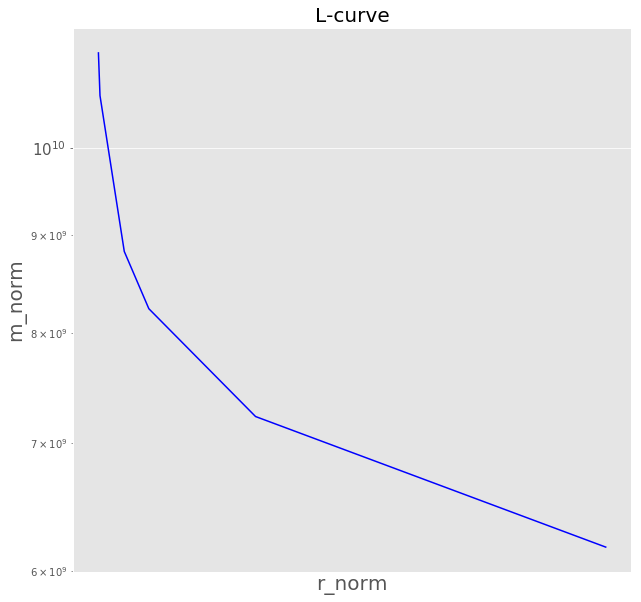

In [49]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

### Results

In [50]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [51]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [52]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [53]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  data/result_RM_airb.pickle
